In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

dataset = "../artifacts/datasets/openrouter_intent_features.csv"
df = pd.read_csv(dataset)

df_train = df[df['split'] == 'train']
df_val = df[df['split'] == 'val']
df_test = df[df['split'] == 'test']

df_train_pos = df_train[df_train['label'] == 1]
df_train_neg = df_train[df_train['label'] == 0]

display(df)

,sample_id,prompt_id,label,split,sequence_hash,chatbot_name,packet_count,size_mean,size_std,size_min,...,time_q10,time_q25,time_q50,time_q75,time_q90,size_top1,size_top2,size_top3,size_top4,size_top5
0,dfada8b71160544fc58096534db06b5ffb255cd3,71c462b3ce0c0b0a66410191b3eec0fbc6e37def,0,val,3c9727875860c556bdac78c53ac85d65f8b39ceb,GPT5MiniOpenRouter,630.0,441.125397,185.024036,119.0,...,0.000548,0.001733,0.006332,0.011296,0.020288,3710.0,2911.0,1089.0,962.0,931.0
1,bbb35c1d7f0339e063492f97372109345d1242c6,2c0309875cd34e768f2534ab07e63d5856e4986a,1,val,a4327d489e0cde04e76cc05388b0a6b86da229d4,GPT5MiniOpenRouter,309.0,476.462783,289.487622,97.0,...,0.000540,0.002163,0.009316,0.013795,0.031720,4379.0,2913.0,1089.0,961.0,945.0
2,36584b19d22841308d7e8af2b5cb7c0bb84ea014,825e040b761fd934b6c52ec9f70778756fb01ee4,0,train,d2d6a1c8951461c42da7adf12f846d2641a3e7ff,GPT5MiniOpenRouter,1345.0,453.989591,169.551939,119.0,...,0.000917,0.005177,0.009978,0.014629,0.027999,4999.0,2912.0,1844.0,1352.0,1089.0
3,4674e4b724f9e297b3ffd0cb83af609f08ae7d56,f022bb766ac5245b71f63fe6101cde03f2019783,0,test,7009c3e1072d1253a070bc0e6d77576f89019870,GPT5MiniOpenRouter,1225.0,451.082449,115.321947,119.0,...,0.000664,0.002508,0.007043,0.011305,0.018665,2035.0,1464.0,1254.0,1089.0,971.0
4,1f91520277798f97ee7aa320ca2fb9e5427e4248,f31463fceb15fe8eaa33f91a52f19ad84445fbcf,1,train,0f022d14da3529ef4b58d6ebcdc6c047bee58e4a,GPT5MiniOpenRouter,1013.0,440.952616,139.370223,119.0,...,0.001073,0.002839,0.009277,0.013211,0.027665,2913.0,2483.0,1543.0,1089.0,945.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12851,c61c3a5d0065710e62ddb88970481fca32eabcde,e58ddf74106ac8eae8c922a7b06b8308a6183974,0,train,0f5a4c186ae24f573196bd7aed0636290e8b2341,GPT5MiniOpenRouter,758.0,400.482850,210.389522,119.0,...,0.000741,0.002711,0.008035,0.010191,0.025773,5127.0,2912.0,1089.0,683.0,677.0
12852,2514208b05a56a42d738b980721029680fcff966,ed651f343f57457c824a01dfa5e429e8d62ea52d,1,test,f7bf25a33566225faf610a80a31eaf11fc6291ec,GPT5MiniOpenRouter,347.0,397.659942,198.336002,119.0,...,0.000862,0.006785,0.009259,0.011591,0.023389,2912.0,2275.0,1457.0,1457.0,1089.0
12853,6c1b2099b853d6f6d8581b7f7e171bb6d30a6065,df51767be37a5b3bf47942c13d5fe7348335a47a,1,train,53ae70a25a3d6876fe1995b02910d8fd7b988e65,GPT5MiniOpenRouter,630.0,451.684127,145.308780,93.0,...,0.000793,0.002021,0.008165,0.017665,0.032781,2912.0,2055.0,1089.0,968.0,745.0
12854,711d03b7a99f48926f94040a86fcec152dc4a1fd,968a9407d75f944f72d41b24c6b0d4404f7edd1f,1,train,410dc68bc3856ccba2ad23f31fd9dd77103e6a9e,GPT5MiniOpenRouter,364.0,431.876374,320.268480,119.0,...,0.000706,0.000995,0.002229,0.007882,0.014192,5719.0,2913.0,1089.0,931.0,677.0


In [97]:
df.iloc[0]

sample_id                         dfada8b71160544fc58096534db06b5ffb255cd3
prompt_id                         71c462b3ce0c0b0a66410191b3eec0fbc6e37def
label                                                                    0
split                                                                  val
sequence_hash                     3c9727875860c556bdac78c53ac85d65f8b39ceb
chatbot_name                                            GPT5MiniOpenRouter
packet_count                                                         630.0
size_mean                                                       441.125397
size_std                                                        185.024036
size_min                                                             119.0
size_max                                                            3710.0
time_mean                                                         0.014465
time_std                                                          0.048805
time_min                 

In [74]:
df.columns

Index(['sample_id', 'prompt_id', 'label', 'split', 'sequence_hash',
       'chatbot_name', 'packet_count', 'size_mean', 'size_std', 'size_min',
       'size_max', 'time_mean', 'time_std', 'time_min', 'time_max',
       'size_entropy', 'time_entropy', 'size_run_count', 'size_run_mean',
       'size_run_max', 'time_run_count', 'time_run_mean', 'time_run_max',
       'response_token_count_empty_pct', 'temperature', 'trial', 'size_q10',
       'size_q25', 'size_q50', 'size_q75', 'size_q90', 'time_q10', 'time_q25',
       'time_q50', 'time_q75', 'time_q90', 'size_top1', 'size_top2',
       'size_top3', 'size_top4', 'size_top5'],
      dtype='object')

In [94]:
def plot_scatter(x_axis, y_axis):
    plt.figure()

    plt.scatter(df_train_pos[x_axis], df_train_pos[y_axis], marker='+', label='malicious')
    plt.scatter(df_train_neg[x_axis], df_train_neg[y_axis], marker='_', label='benign')

    plt.xlabel(x_axis)
    plt.ylabel(y_axis)
    plt.title(f'Scatter Plot of {x_axis} vs {y_axis}')
    plt.legend()

    plt.show()

def plot_histogram(x_axis, bins=50, plot_lim=None, density=True):
    """
    Parameters:
    - x-axis: attribute to plot on the x-axis
    - bins: number of bins
    - xlim: tuple (min, max) to cut off x-axis, e.g. (0, 100). None for no cutoff
    - density: if True, plot normalized frequency (density), else raw counts
    """

    # Compute shared bin edges across both groups so bin widths are identical
    combined = np.concatenate([df_train_pos[x_axis].values, df_train_neg[x_axis].values])
    bin_edges = np.linspace(combined.min(), combined.max(), bins + 1)

    # Compute weights so bar heights sum to 1, independent of bin width
    if density:
        weights_pos  = np.ones(len(df_train_pos))  / len(df_train_pos)
        weights_neg = np.ones(len(df_train_neg)) / len(df_train_neg)
    else:
        weights_pos  = None
        weights_neg = None

    plt.figure()
    plt.hist(df_train_pos[x_axis], bins=bin_edges, alpha=0.5, label='malicious', weights=weights_pos, histtype='step')
    plt.hist(df_train_neg[x_axis], bins=bin_edges, alpha=0.5, label='benign', weights=weights_neg, histtype='step')

    if plot_lim is not None:
        plt.xlim(plot_lim)

    plt.xlabel(x_axis)
    plt.ylabel('Density' if density else 'Frequency')
    plt.title(f'{"Normalized " if density else ""}Histogram of {x_axis} by Request Intent')
    plt.legend()
    plt.show()

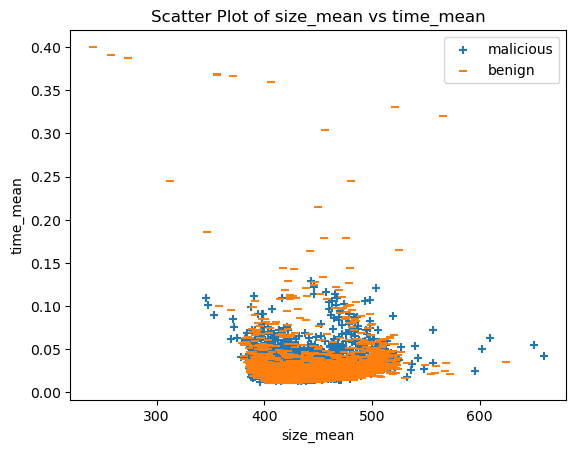

In [46]:
plot_scatter('size_mean', 'time_mean')

In [106]:
features = ['packet_count', 'size_mean', 'size_std', 'size_min',
       'size_max', 'time_mean', 'time_std', 'time_min', 'time_max',
       'size_entropy', 'time_entropy', 'size_run_count', 'size_run_mean',
       'size_run_max', 'time_run_count', 'time_run_mean', 'time_run_max',
       'response_token_count_empty_pct', 'temperature', 'size_q10',
       'size_q25', 'size_q50', 'size_q75', 'size_q90', 'time_q10', 'time_q25',
       'time_q50', 'time_q75', 'time_q90', 'size_top1', 'size_top2',
       'size_top3', 'size_top4', 'size_top5']

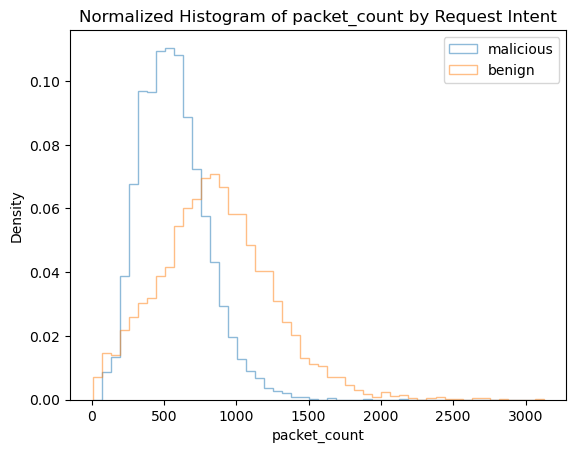

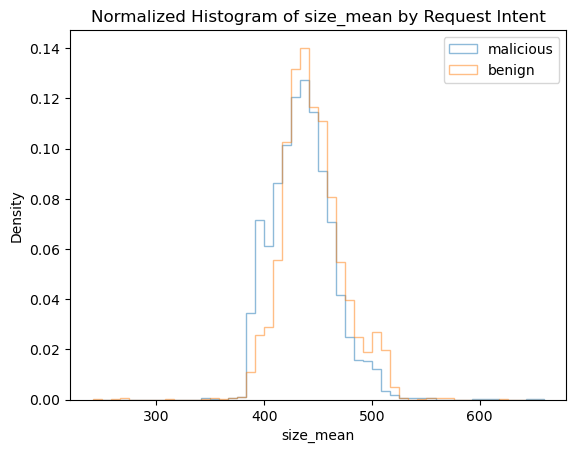

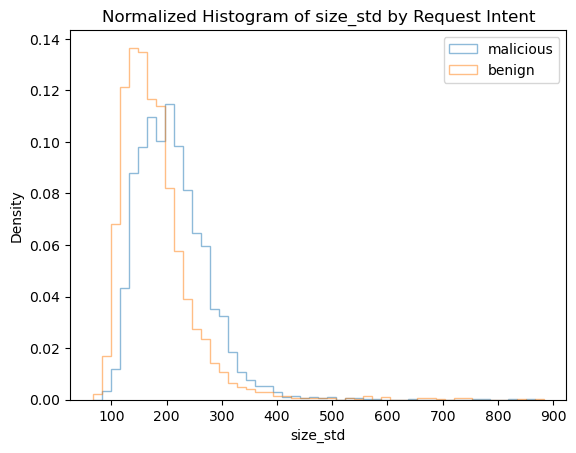

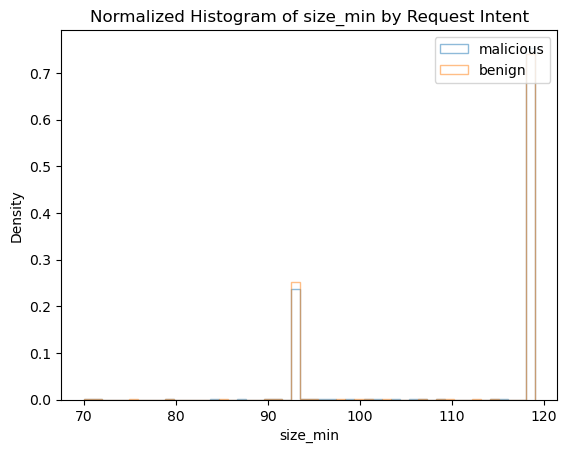

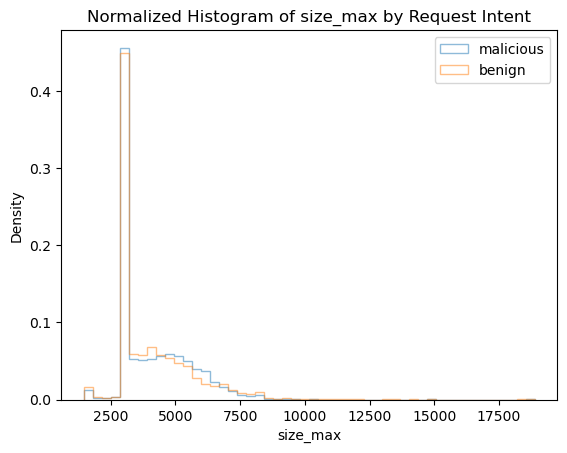

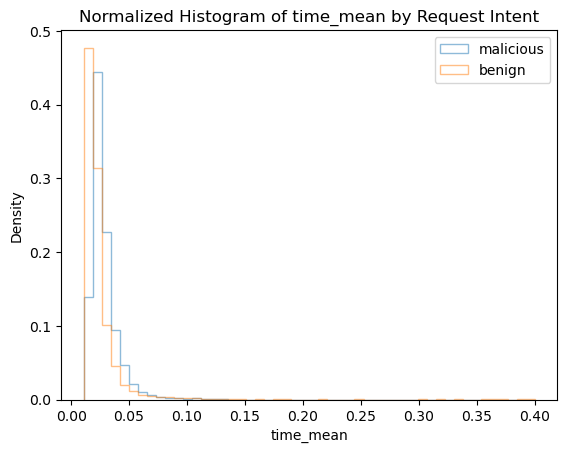

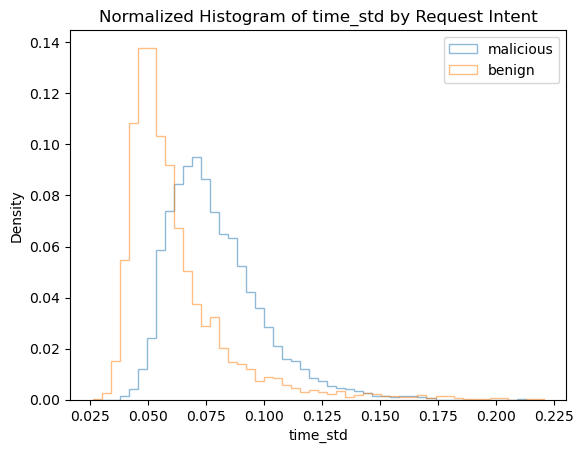

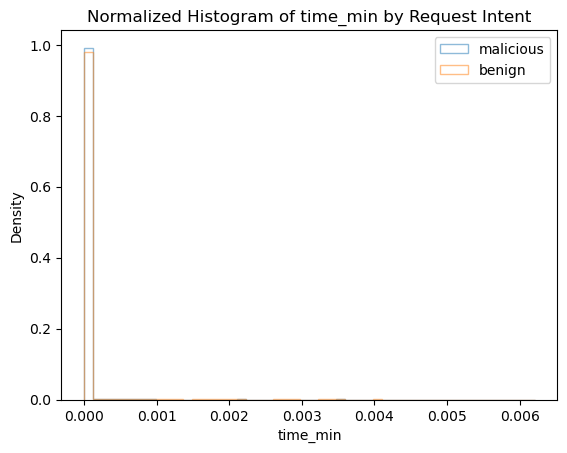

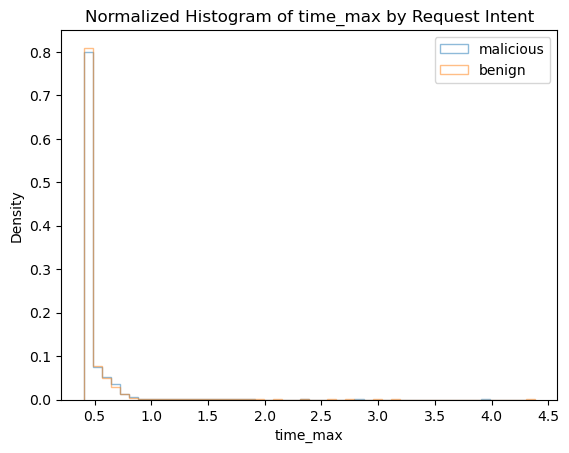

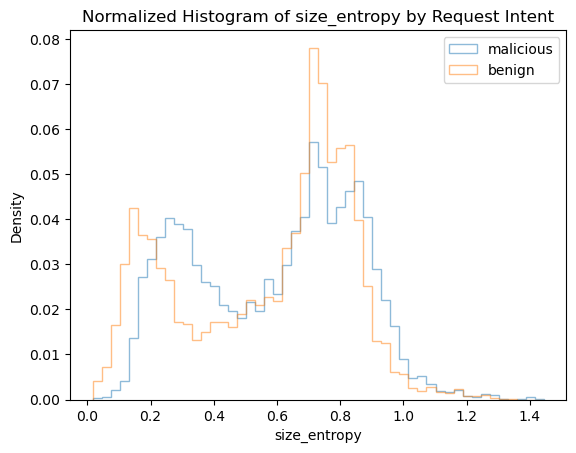

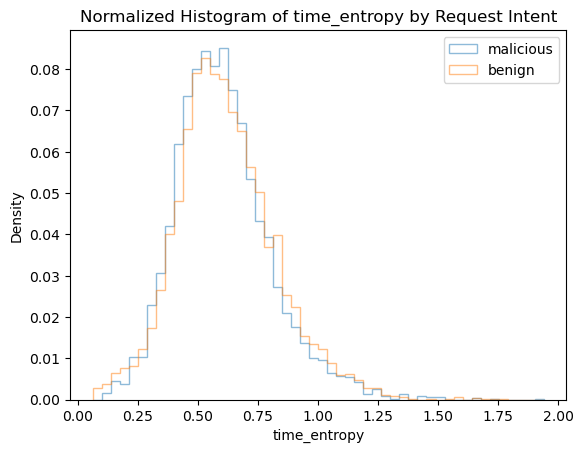

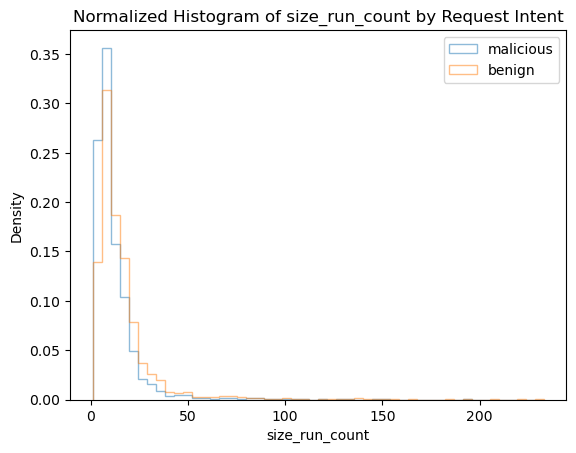

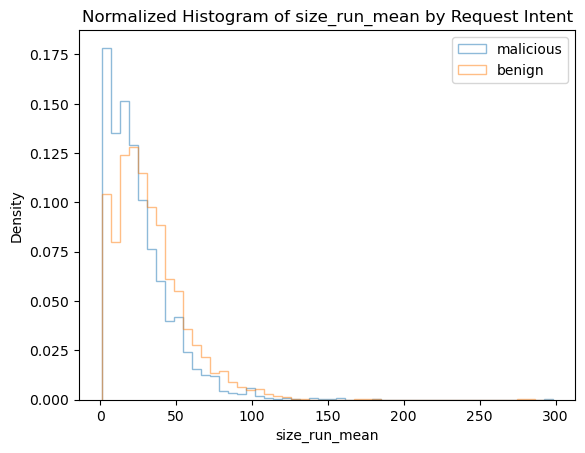

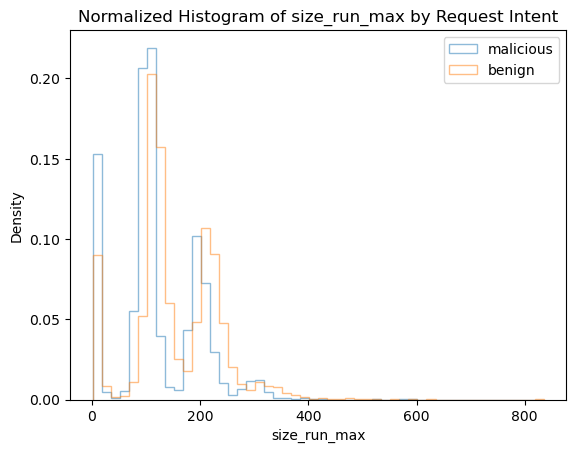

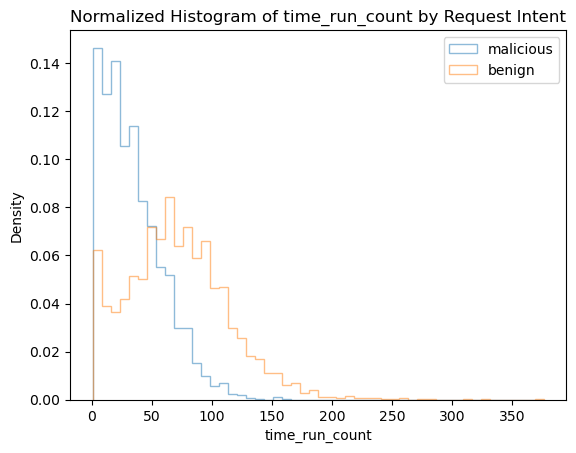

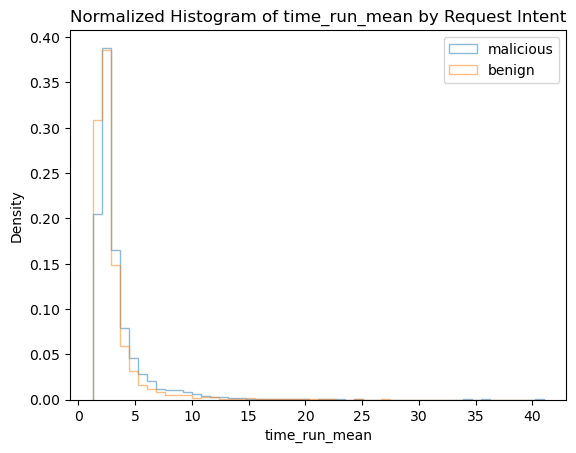

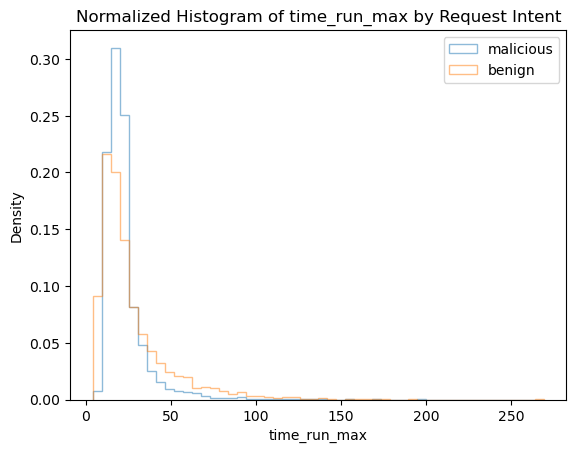

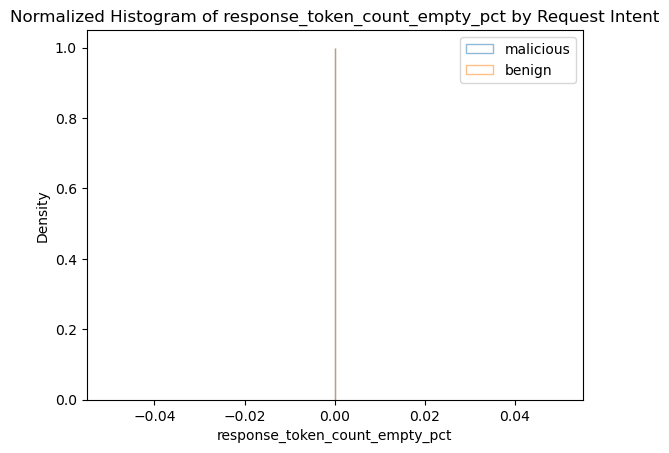

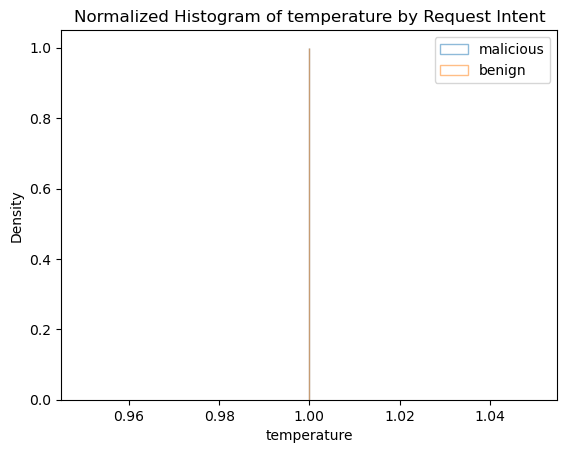

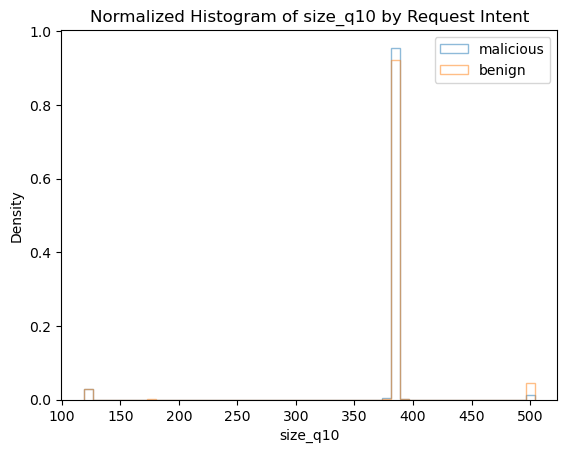

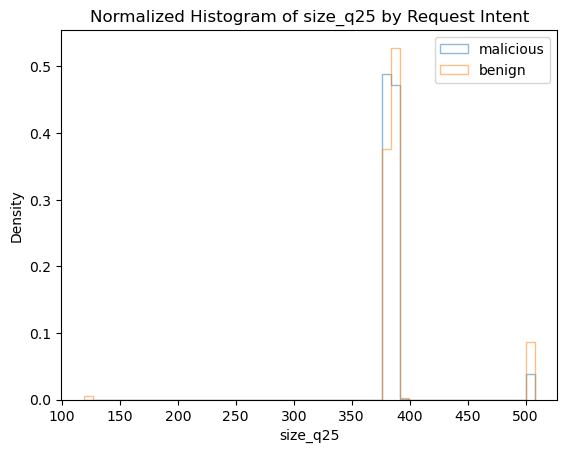

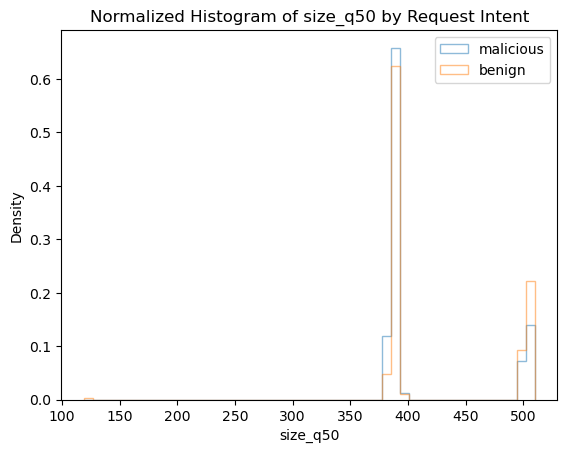

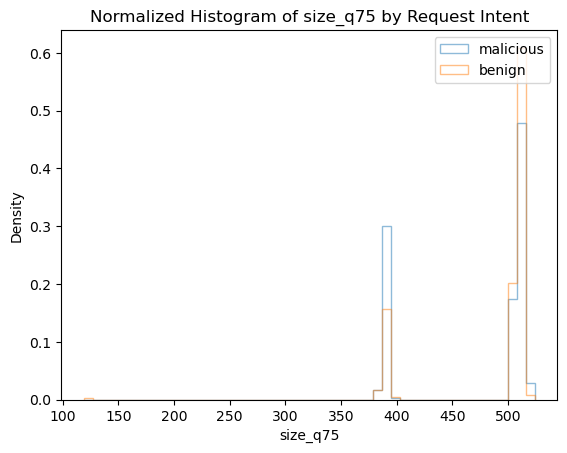

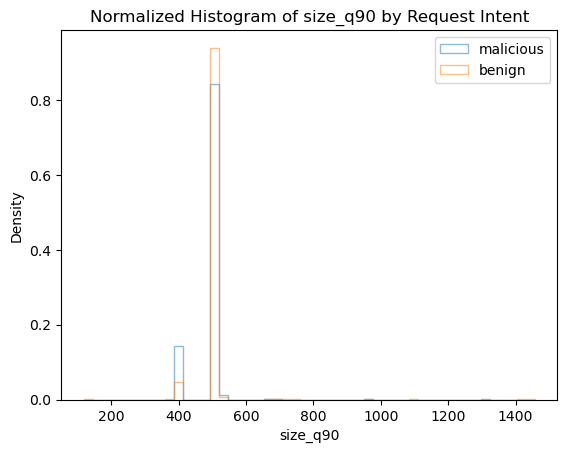

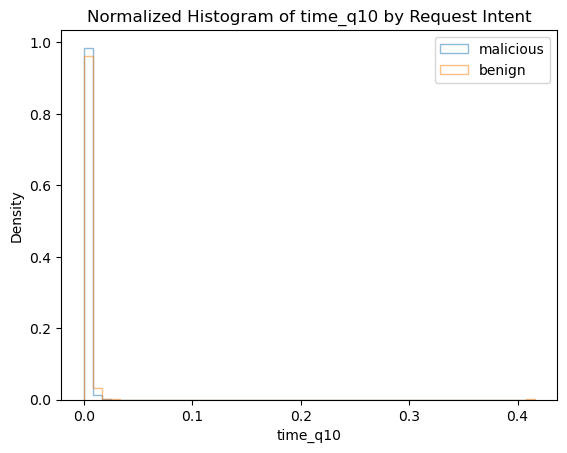

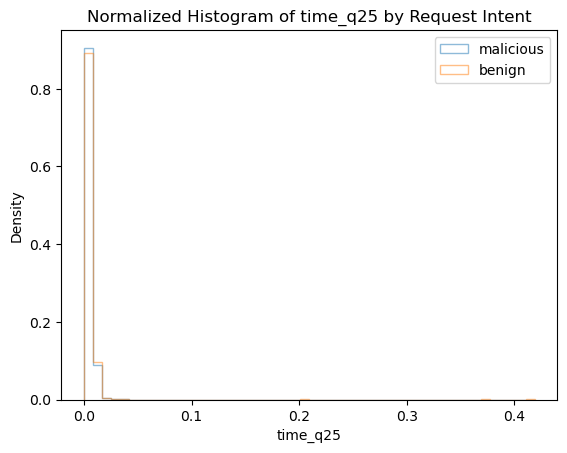

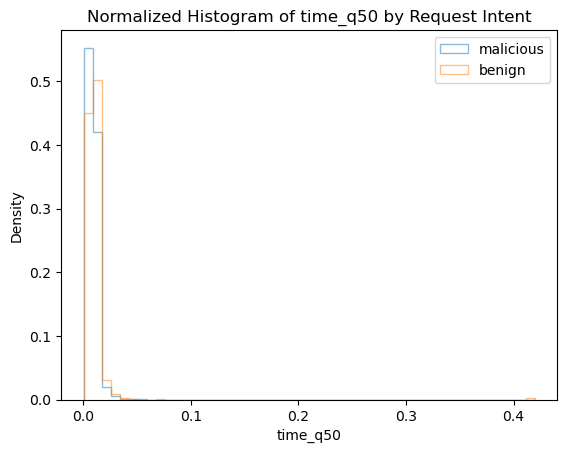

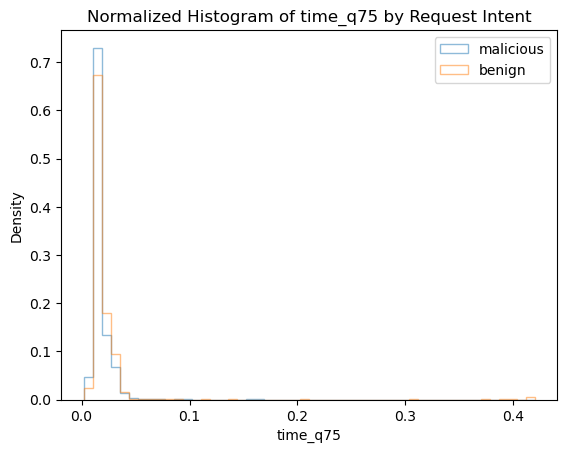

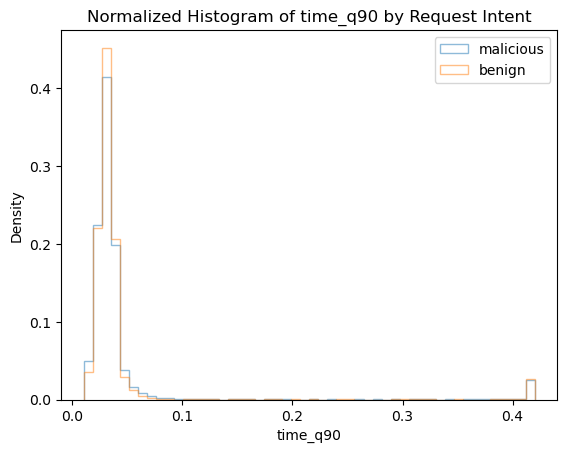

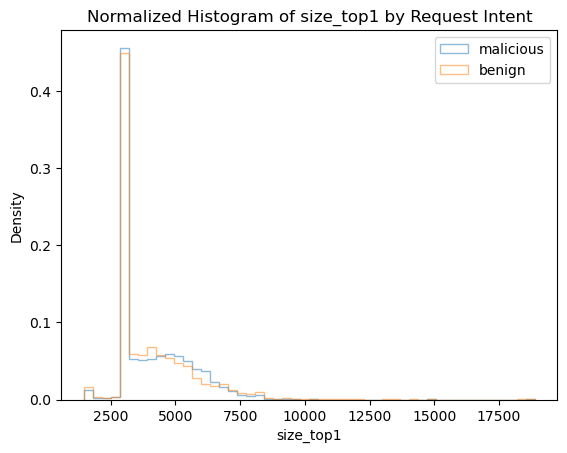

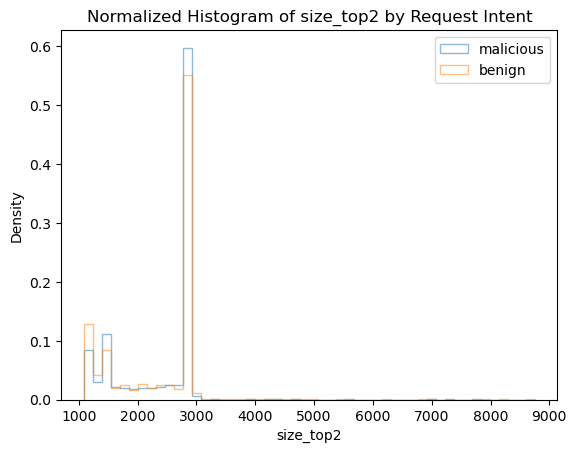

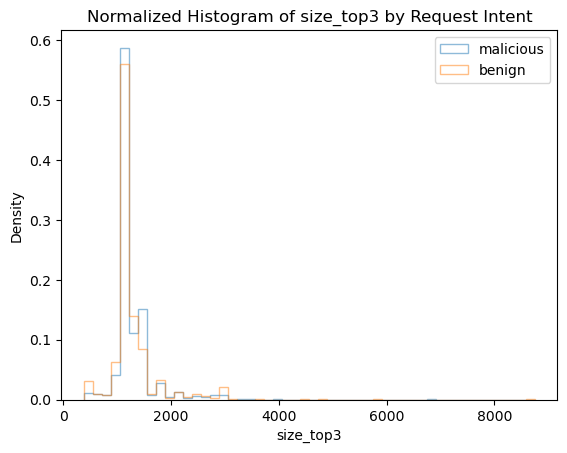

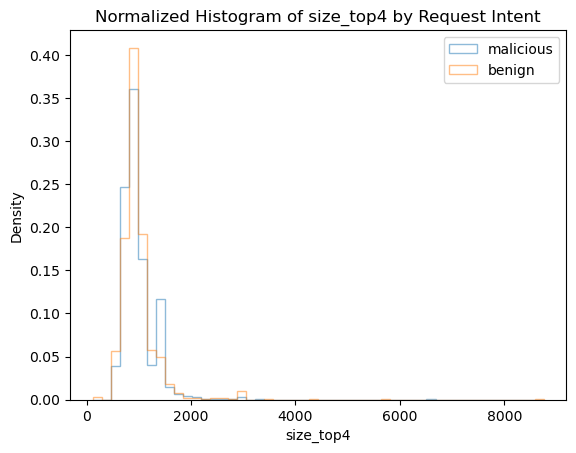

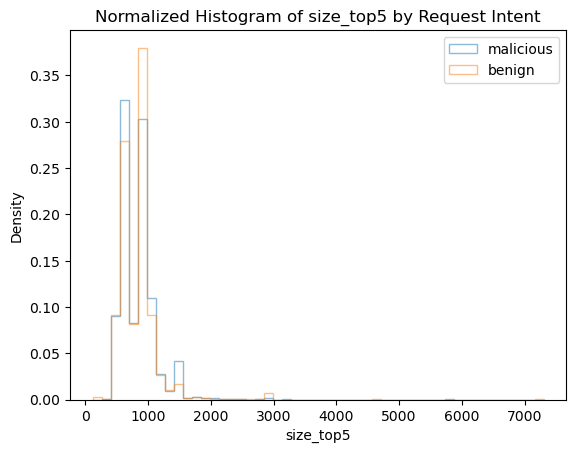

In [107]:
for feature in features:
    plot_histogram(feature)

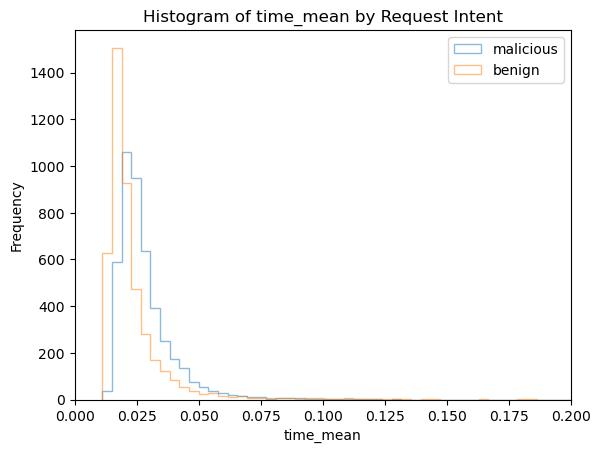

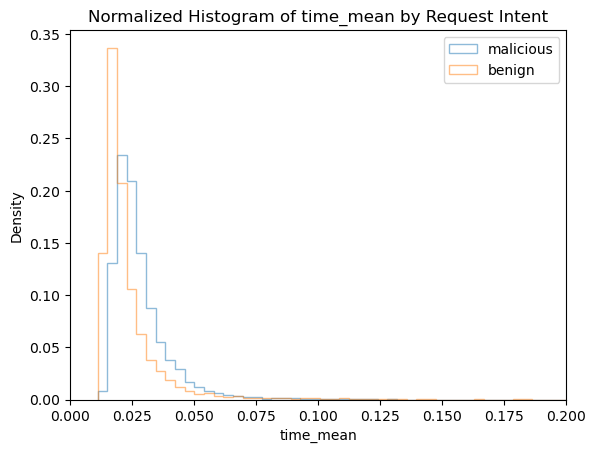

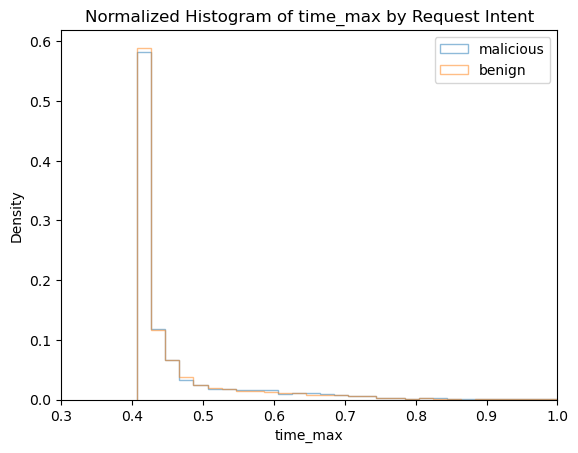

In [104]:
plot_histogram('time_mean', bins=100, plot_lim=(0, 0.2), density=False)
plot_histogram('time_mean', bins=100, plot_lim=(0, 0.2))
plot_histogram('time_max', bins=200, plot_lim=(0.3, 1))